# **Project Name**    - Bike Sharing Demand Prediction









##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**    - Prathik Mane

# **Project Summary -**

* The aim of the project is to predict bike rental demand based on weather conditions, time of day, and other factors. The dataset used in the project consists of 8760 rows and 14 columns, providing a comprehensive range of information.

* The dataset's 14 columns represent variables such as 'Date', 'Seasons', 'Holiday', 'Functional day', 'Hour', 'Rainfall', 'Snowfall', 'Rented Bike count', 'Temperature', 'Humidity', 'Dew Point Temperature', 'Visibility', 'Solar radiation', and 'Windspeed'. The dataset is clean and does not contain any duplicate or null values.

* To gather information about the dataset, various basic functions and attributes like Head(), Tail(), Info(), Describe(), and Columns() are used in the data collection step.

* The prediction algorithm is developed using Python libraries such as Pandas, Numpy, and sklearn. The models implemented include Linear Regression, Linear Regression with Ridge Regularization, Linear Regression with Lasso Regularization, Decision Tree Regressor, RandomForest Regressor, and XGBoost Regressor. The aim is to test and evaluate these models to determine which algorithms provide the most accurate predictions for bike rental demand.

* The evaluation of the models is based on Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Relative Mean Squared Percentage Error (RMPSE). These metrics are used to assess the performance of the models, and the model that performs better in terms of accuracy is selected.

* Overall, the project focuses on predicting bike rental demand by leveraging weather conditions, time of day, and other factors. Various models are tested and evaluated using appropriate metrics to determine the most accurate prediction algorithm.

# **GitHub Link -**

https://github.com/Ryansh12/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

#### **Define Your Business Objective?**

The objective of this project is to predict bike rental demand based on the prevailing weather conditions, time of day and other factors


**Attributes in Dataset**

Date: Date in DD/MM/YYYY format

Hour: Hour of the day (0-23)

Temperature:  Temperature of the day in Celcius

Humidity: Humidity measure(relative)

Windspeed:  Windspeed measure in m/s

Visibility: Visibility measure

Dew Point Temperature:  Dew Point Temperature Measure in Celcius

Solar Radiation: Solar Radiation Measure  

Rainfall: Rainfall in mm

Snowfall: Snowfall measure

Seasons:  1 = spring, 2 = summer, 3 - fall, 4 = winter

Holiday:  Whether a holiday or not

Functional Day:  Whether a functional day or not i.e day is neither a weekend nor holiday

## **Download Dataset**

In [1]:
# Download the dataset
!gdown '1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS'

Downloading...
From: https://drive.google.com/uc?id=1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS
To: /content/SeoulBikeData.csv
100% 604k/604k [00:00<00:00, 91.4MB/s]


### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tabulate import tabulate

### Dataset Loading

In [3]:
# Checking Encoding of file due to UnicodeDecode Error
# ref: https://www.kaggle.com/code/paultimothymooney/how-to-resolve-a-unicodedecodeerror-for-a-csv-file
import chardet
with open('SeoulBikeData.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-9',
 'confidence': 0.7396635956274547,
 'language': 'Turkish'}

In [4]:
# Load Dataset
data = pd.read_csv('SeoulBikeData.csv', encoding = 'ISO-8859-9')

### Dataset First View

In [5]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [6]:
data.shape

(8760, 14)

Dataset consists of 8760 rows with 13 independent variable and 1 dependent variable i.e Rented Bike Count

### Dataset Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

10 out of 14 columns are numeric and 1 is date and rest are string  

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

None of the columns have missing values

In [10]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe

# For string/object
data.describe(include = ['O'])

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

In [12]:
# For numeric
data.describe(include=['number'])

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in ['Seasons', 'Holiday', 'Functioning Day']:
  print(column)
  print(data[column].value_counts(),"\n")

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64 



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [14]:
data['Date'] = pd.to_datetime(data['Date'] , format="%d/%m/%Y")

In [15]:
data.iloc[0]['Date'].date()

datetime.date(2017, 12, 1)

Splitting date into dayofweek, month, year

In [16]:

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['weekday'] = data['Date'].dt.dayofweek

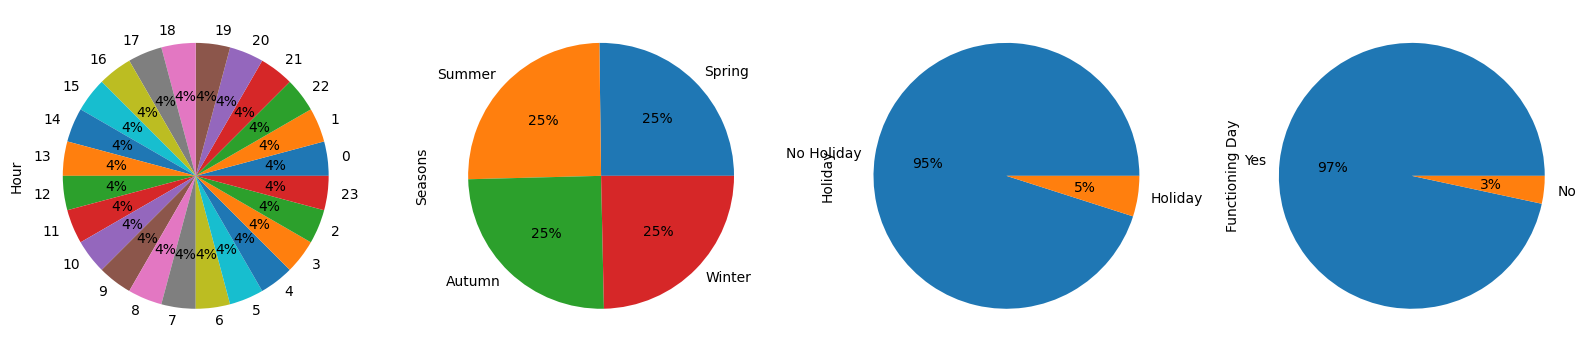

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

data['Hour'].value_counts().plot(ax=axes[0], kind='pie',autopct='%1.0f%%')
data['Seasons'].value_counts().plot(ax=axes[1], kind='pie',autopct='%1.0f%%')
data['Holiday'].value_counts().plot(ax=axes[2], kind='pie',autopct='%1.0f%%')
data['Functioning Day'].value_counts().plot(ax=axes[3], kind='pie',autopct='%1.0f%%')

fig.tight_layout()
plt.show()

In [18]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
data['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

1. Seasons has approximately equally distributed data for all categories
2. hour has exactly equally distributed data for all categories
3. Holiday and Functional Day has unequal data distribution in the categories

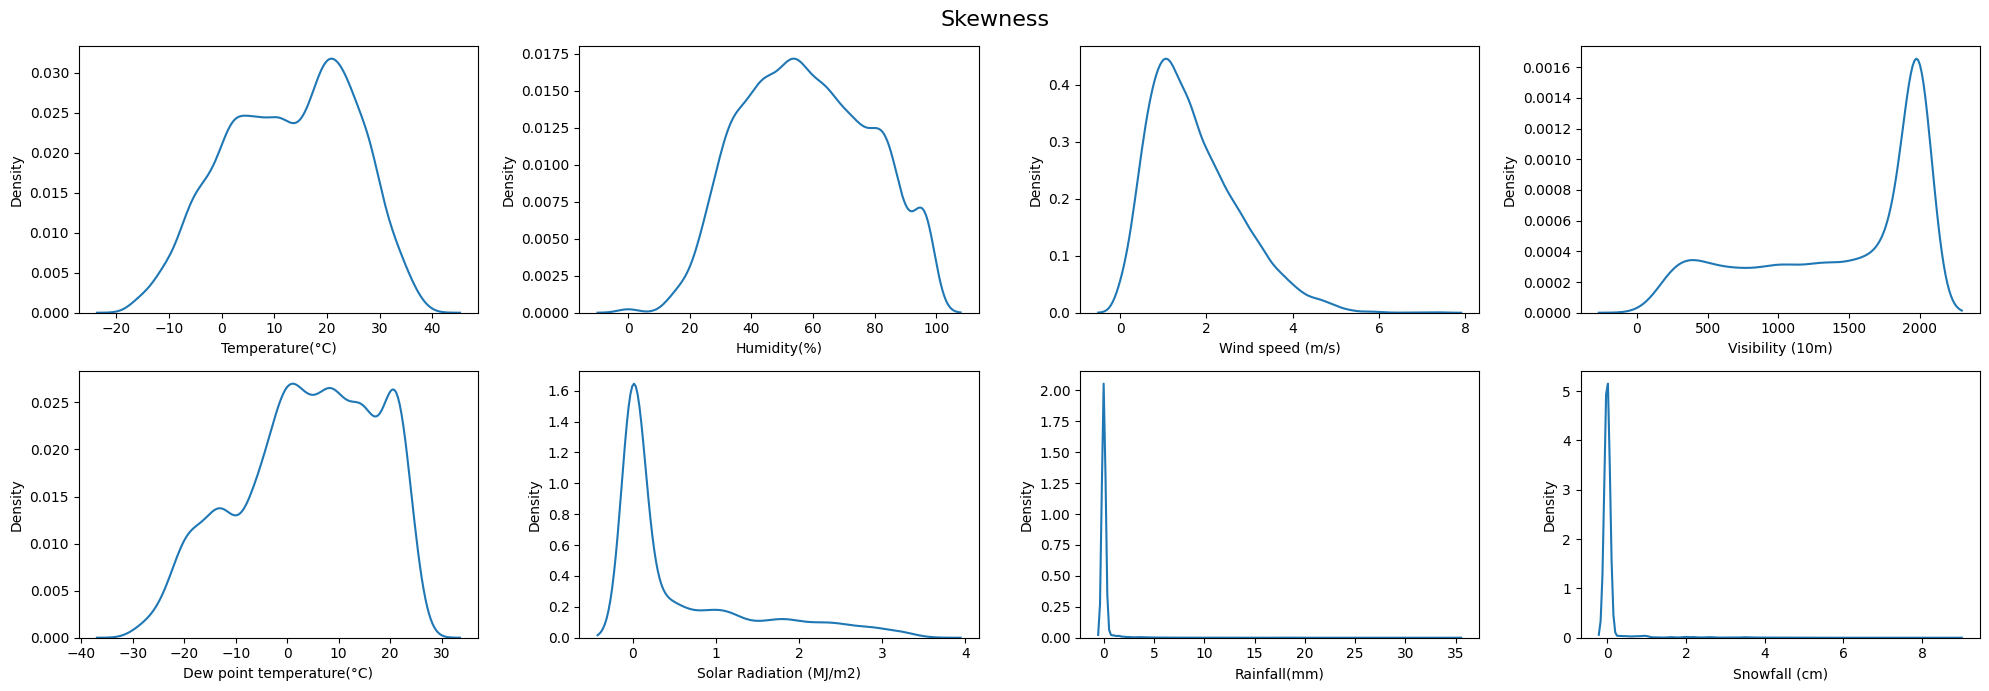

In [20]:
# checking Skewness
fig, axes = plt.subplots(2, 4, figsize=(20, 7))
fig.suptitle('Skewness', fontsize=16)

sns.kdeplot(ax=axes[0, 0], data=data, x="Temperature(°C)")
sns.kdeplot(ax=axes[0, 1], data=data, x="Humidity(%)")
sns.kdeplot(ax=axes[0, 2], data=data, x="Wind speed (m/s)")
sns.kdeplot(ax=axes[0, 3], data=data, x="Visibility (10m)")
sns.kdeplot(ax=axes[1, 0], data=data, x="Dew point temperature(°C)")
sns.kdeplot(ax=axes[1, 1], data=data, x="Solar Radiation (MJ/m2)")
sns.kdeplot(ax=axes[1, 2], data=data, x="Rainfall(mm)")
sns.kdeplot(ax=axes[1, 3], data=data, x="Snowfall (cm)")

fig.tight_layout()
plt.show()

1. Visibility, Solar Radiation, Rainfall and snowfall has highly skewed data
2. While other attributes have comparatively less skewed data

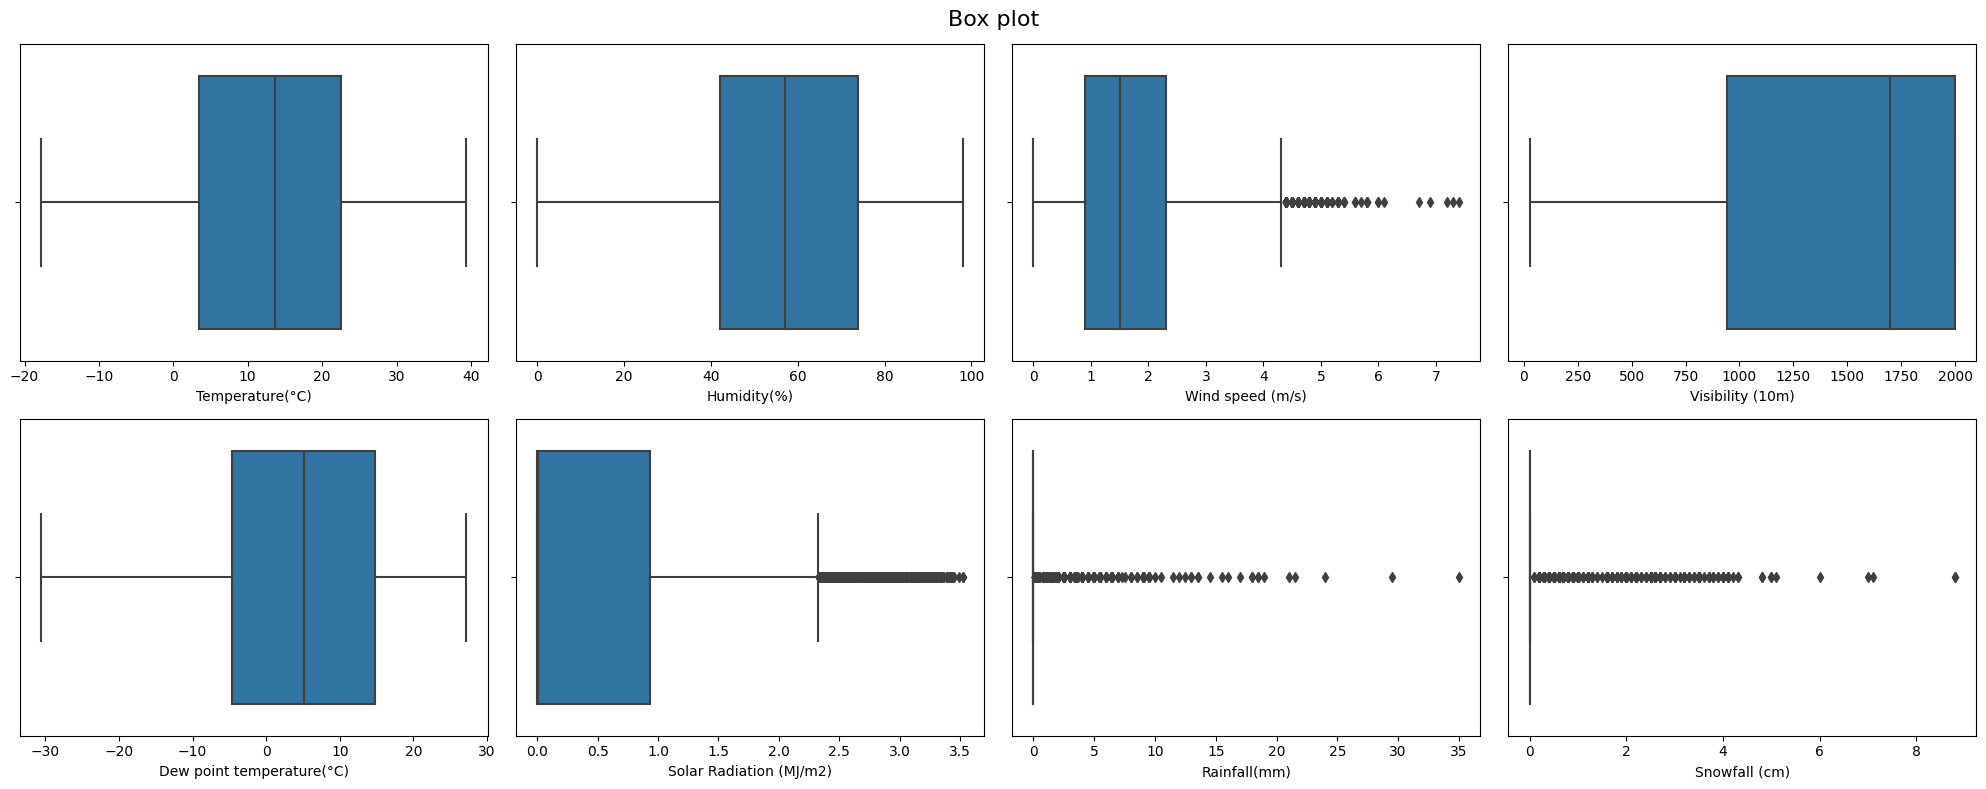

In [21]:
cols = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
row_num = 2
col_num = 4
fig, axes = plt.subplots(row_num , col_num , figsize=(20,8), squeeze=False)
fig.suptitle('Box plot', fontsize=16)

for i, col in enumerate(cols):
  row = int((i - i%col_num)/col_num)
  column = i%col_num
  ax = sns.boxplot(x = col, data = data, ax=axes[row , column])

# to avoid overlapping of subfigures
plt.tight_layout()
plt.show()

We can conclude here that windspeed, Solar Radiation, Rainfall, Snowfall has outliers in it

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour in different months')

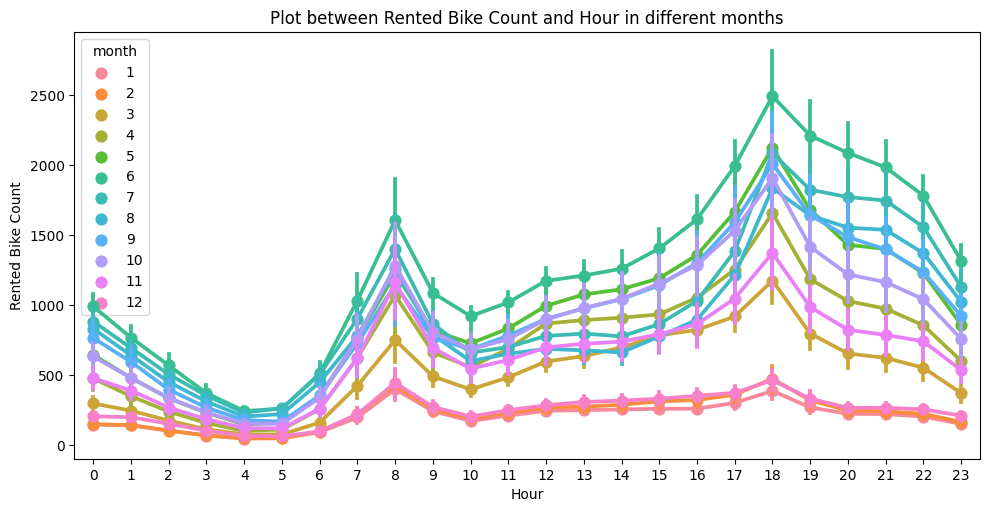

In [22]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'month')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour in different months')

1. December, January, February has the lowest bikes rented count
2. While June has the highest bikes rented count
3. In Every month the demand for bikes peeks at 8AM and 6PM

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour in different years')

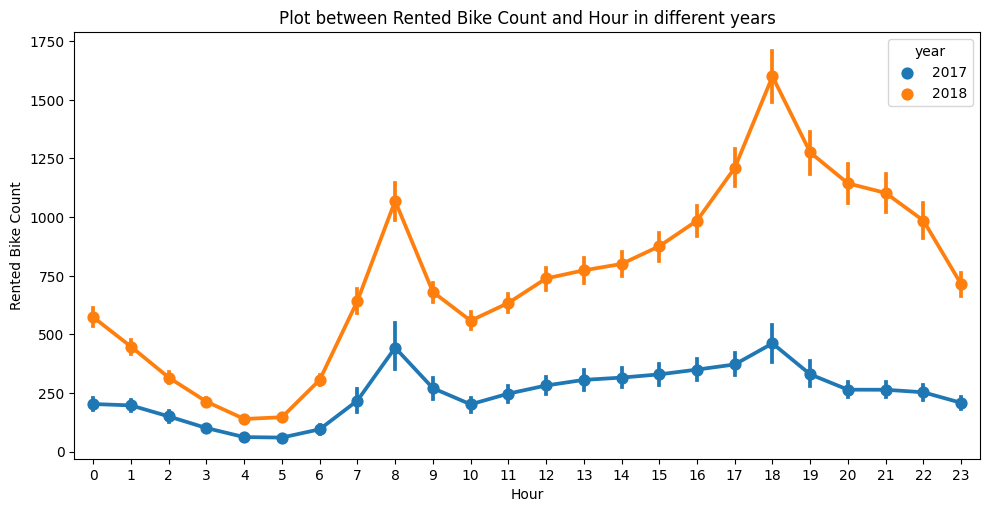

In [23]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'year')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour in different years')

1. Bikes rented in an hour count increased  in 2018 as compared to 2017
2. Although Trend remains the same i.e. the demand for bikes peeks at 8AM and 6PM

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour w.r.t Functioning day')

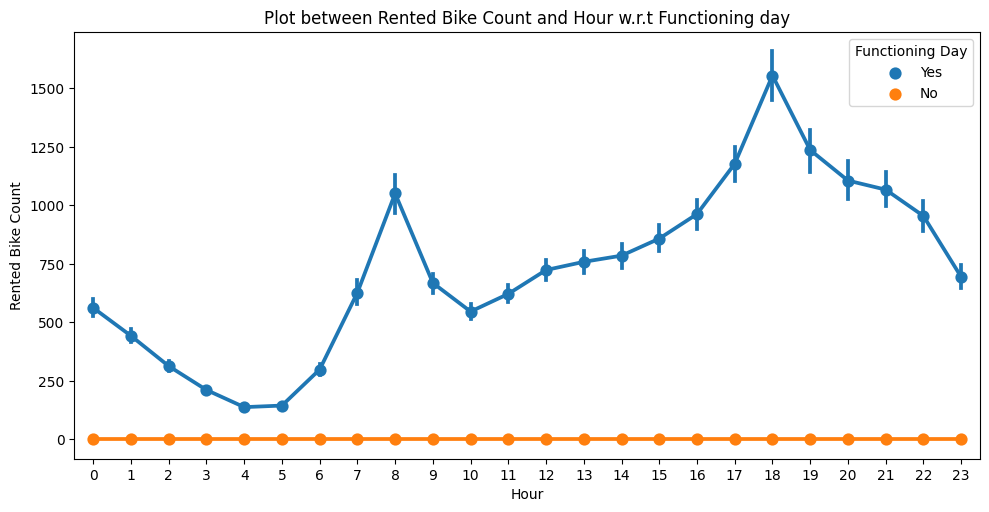

In [24]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'Functioning Day')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour w.r.t Functioning day')

In [25]:
data[data['Functioning Day']=='No']['Rented Bike Count'].sum()

0

Interestingly, there were absolutely zero bikes rented on Non Functional Day, we can also confirm this from above printed bike rented count on non-functional day

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour w.r.t Holiday')

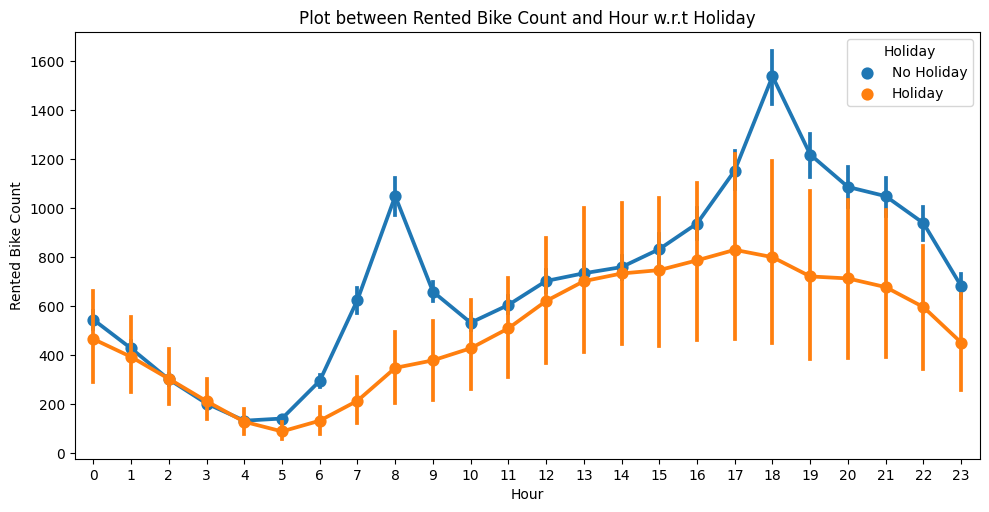

In [26]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'Holiday')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour w.r.t Holiday')

1. On Non Holiday days bike rent demand increased between 7AM-9AM, then again the demand increased from 5PM - 7PM
2. On Holiday days, bike demand was lower throughout the day as compared to Non holiday days

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour w.r.t Seasons')

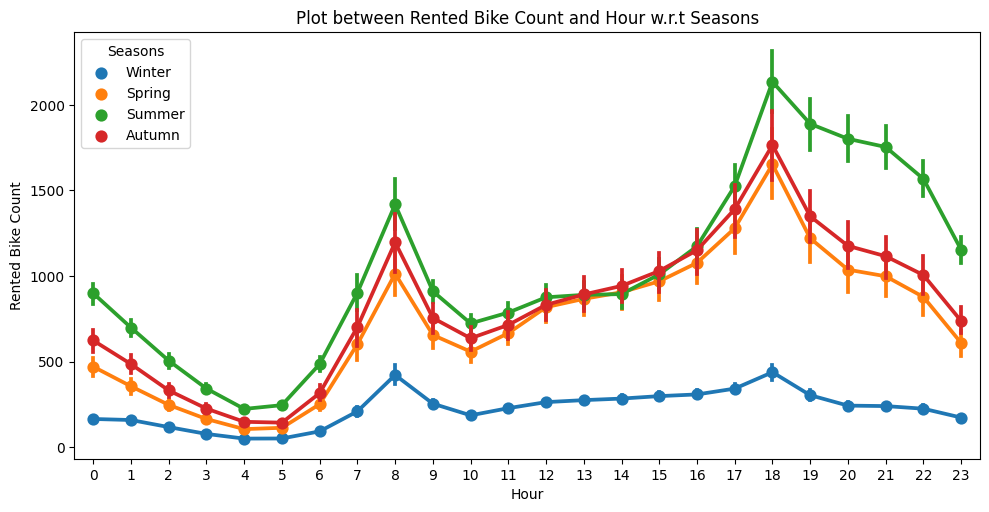

In [27]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'Seasons')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour w.r.t Seasons')

Summer season has the highest bike rented count

Winter season has the lowest bike rented count

Text(0.5, 1.0, 'Plot between Rented Bike Count and Hour during weekdays')

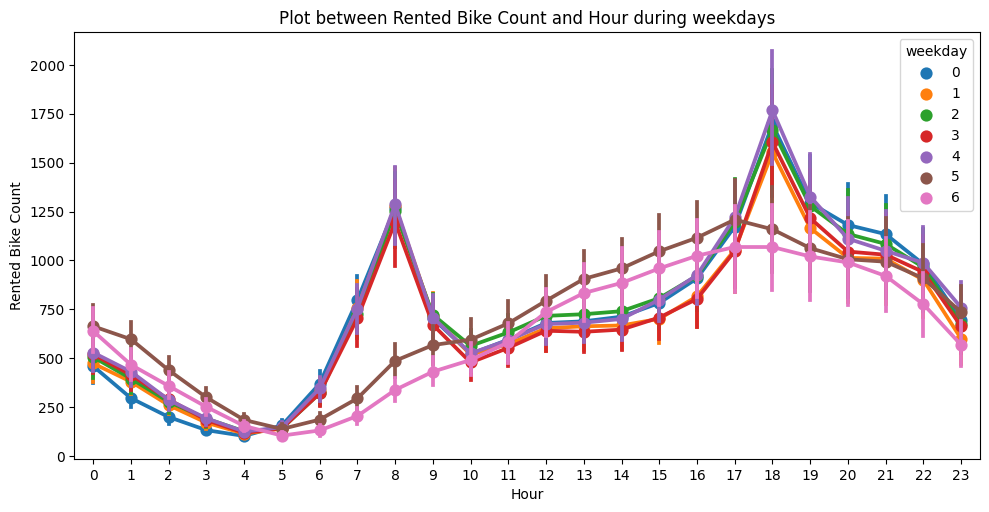

In [28]:
plt.figure(figsize=(10,5))
sns.pointplot(x= 'Hour', y= 'Rented Bike Count', data=data, hue = 'weekday')
plt.tight_layout()
plt.title('Plot between Rented Bike Count and Hour during weekdays')

1. From Monday to Friday,the demand for bikes was high was it peaked at 8AM and 6PM
2. For Saturday and Sunday the demand for bikes was low as compared to other days.

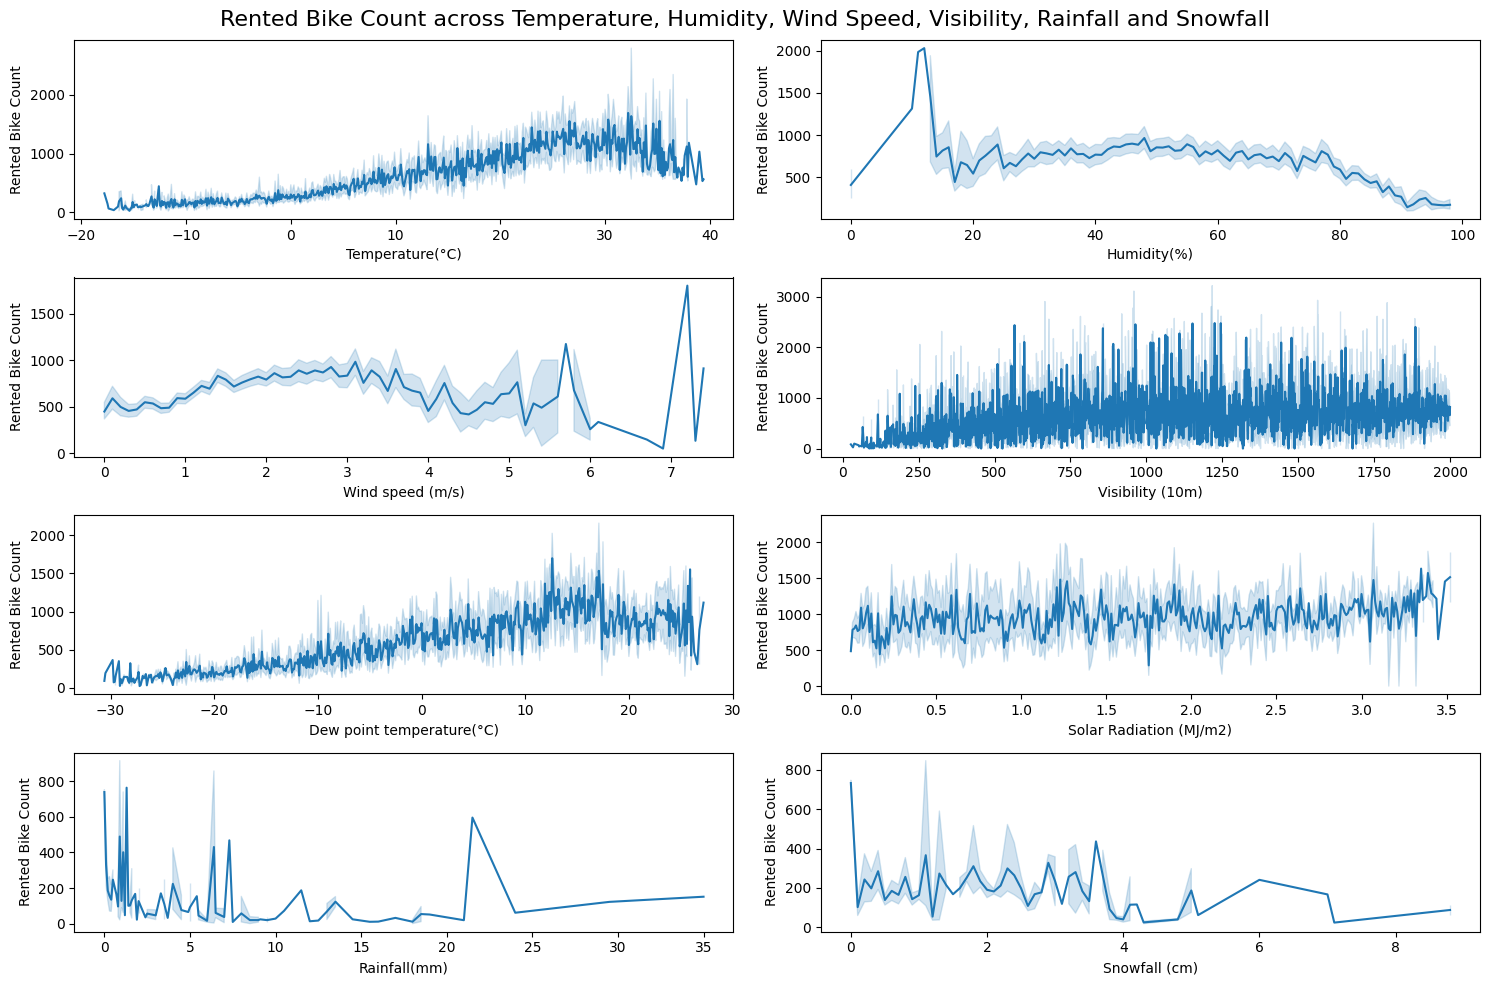

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Rented Bike Count across Temperature, Humidity, Wind Speed, Visibility, Rainfall and Snowfall', fontsize=16)

sns.lineplot(ax=axes[0, 0], data=data, y='Rented Bike Count', x='Temperature(°C)')
sns.lineplot(ax=axes[0, 1], data=data, y='Rented Bike Count', x='Humidity(%)')
sns.lineplot(ax=axes[1, 0], data=data, y='Rented Bike Count', x='Wind speed (m/s)')
sns.lineplot(ax=axes[1, 1], data=data, y='Rented Bike Count', x='Visibility (10m)')
sns.lineplot(ax=axes[2, 0], data=data, y='Rented Bike Count', x='Dew point temperature(°C)')
sns.lineplot(ax=axes[2, 1], data=data, y='Rented Bike Count', x='Solar Radiation (MJ/m2)')
sns.lineplot(ax=axes[3, 0], data=data, y='Rented Bike Count', x='Rainfall(mm)')
sns.lineplot(ax=axes[3, 1], data=data, y='Rented Bike Count', x='Snowfall (cm)')

fig.tight_layout()
plt.show()

1. As temperature increases till 30°C, rented bike count also increases, after that the rented bike count decreases gradually, similar behavior is seen in Dew point temperature
2. Till 10% humidity, the rented bike count is steeply increased, but after that the count has fallen drastically
3. Visibility, Solar radiation doesn't reflect any direct relation with rented bike count
4. Highest number of rented bike count can be seen when the Snowfall is zero, but it drastically decreases as the snowfall starts
5. Also, sudden increase in rented bike can be seen when the wind speed is ~7m/s

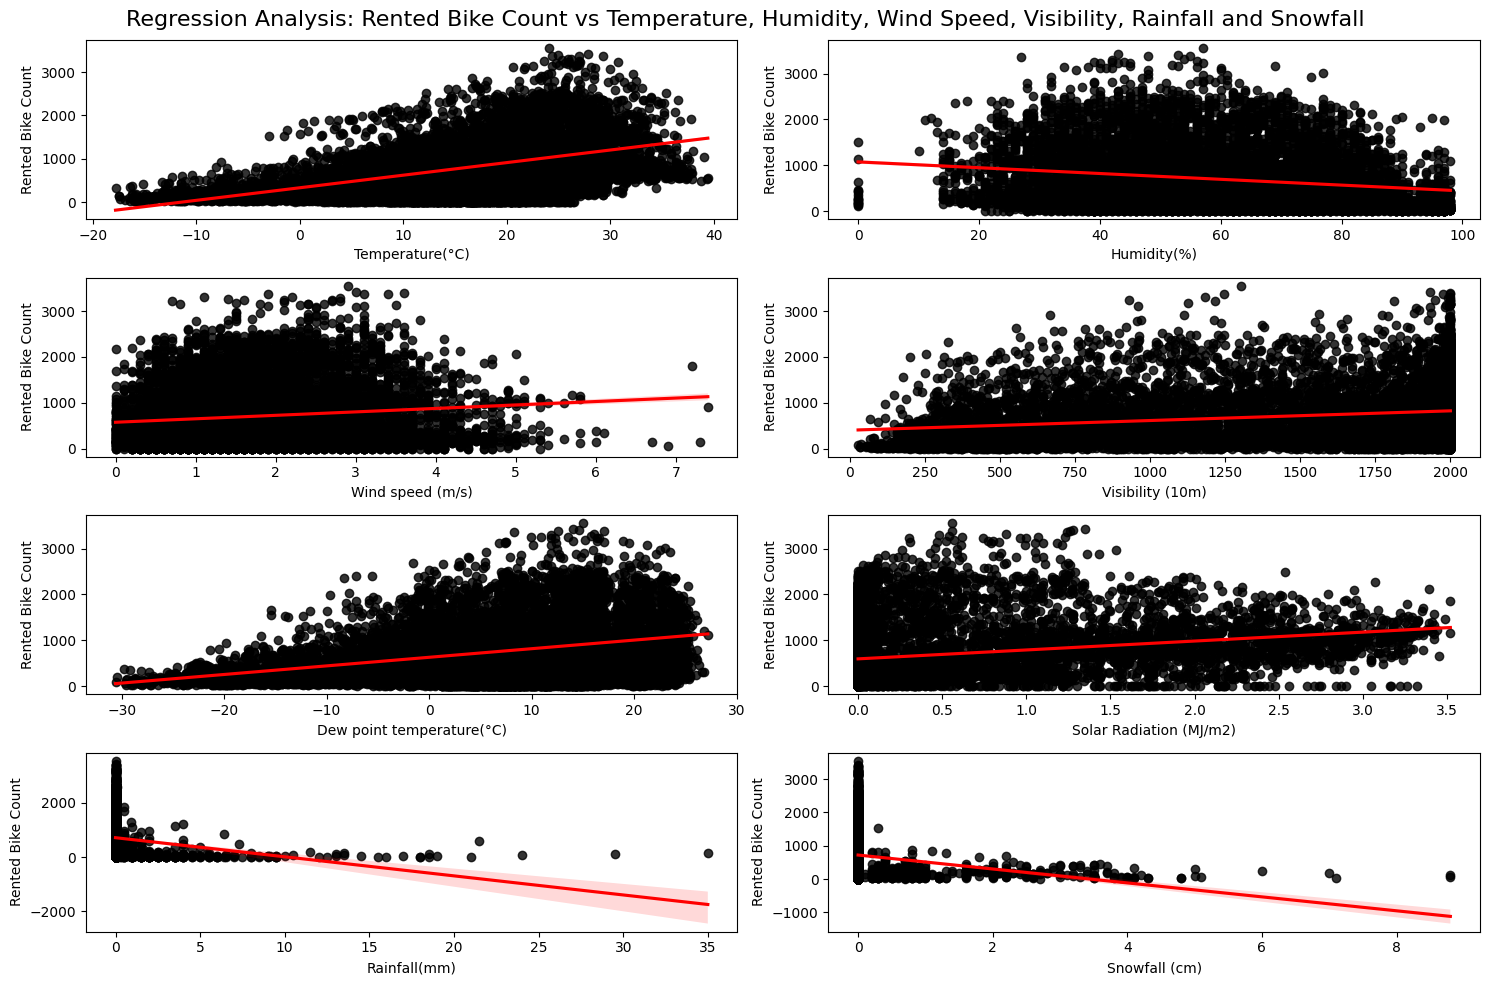

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Regression Analysis: Rented Bike Count vs Temperature, Humidity, Wind Speed, Visibility, Rainfall and Snowfall', fontsize=16)

sns.regplot(ax=axes[0, 0], data=data, y='Rented Bike Count', x='Temperature(°C)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[0, 1], data=data, y='Rented Bike Count', x='Humidity(%)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[1, 0], data=data, y='Rented Bike Count', x='Wind speed (m/s)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[1, 1], data=data, y='Rented Bike Count', x='Visibility (10m)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[2, 0], data=data, y='Rented Bike Count', x='Dew point temperature(°C)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[2, 1], data=data, y='Rented Bike Count', x='Solar Radiation (MJ/m2)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[3, 0], data=data, y='Rented Bike Count', x='Rainfall(mm)', scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.regplot(ax=axes[3, 1], data=data, y='Rented Bike Count', x='Snowfall (cm)', scatter_kws={"color": "black"}, line_kws={"color": "red"})

fig.tight_layout()
plt.show()

1. Temperature(°C), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2) have positive correlation with rented bike count
2. Humidity(%), Rainfall(mm), Snowfall (cm) have negative correlation with rented bike count

Pair Plot

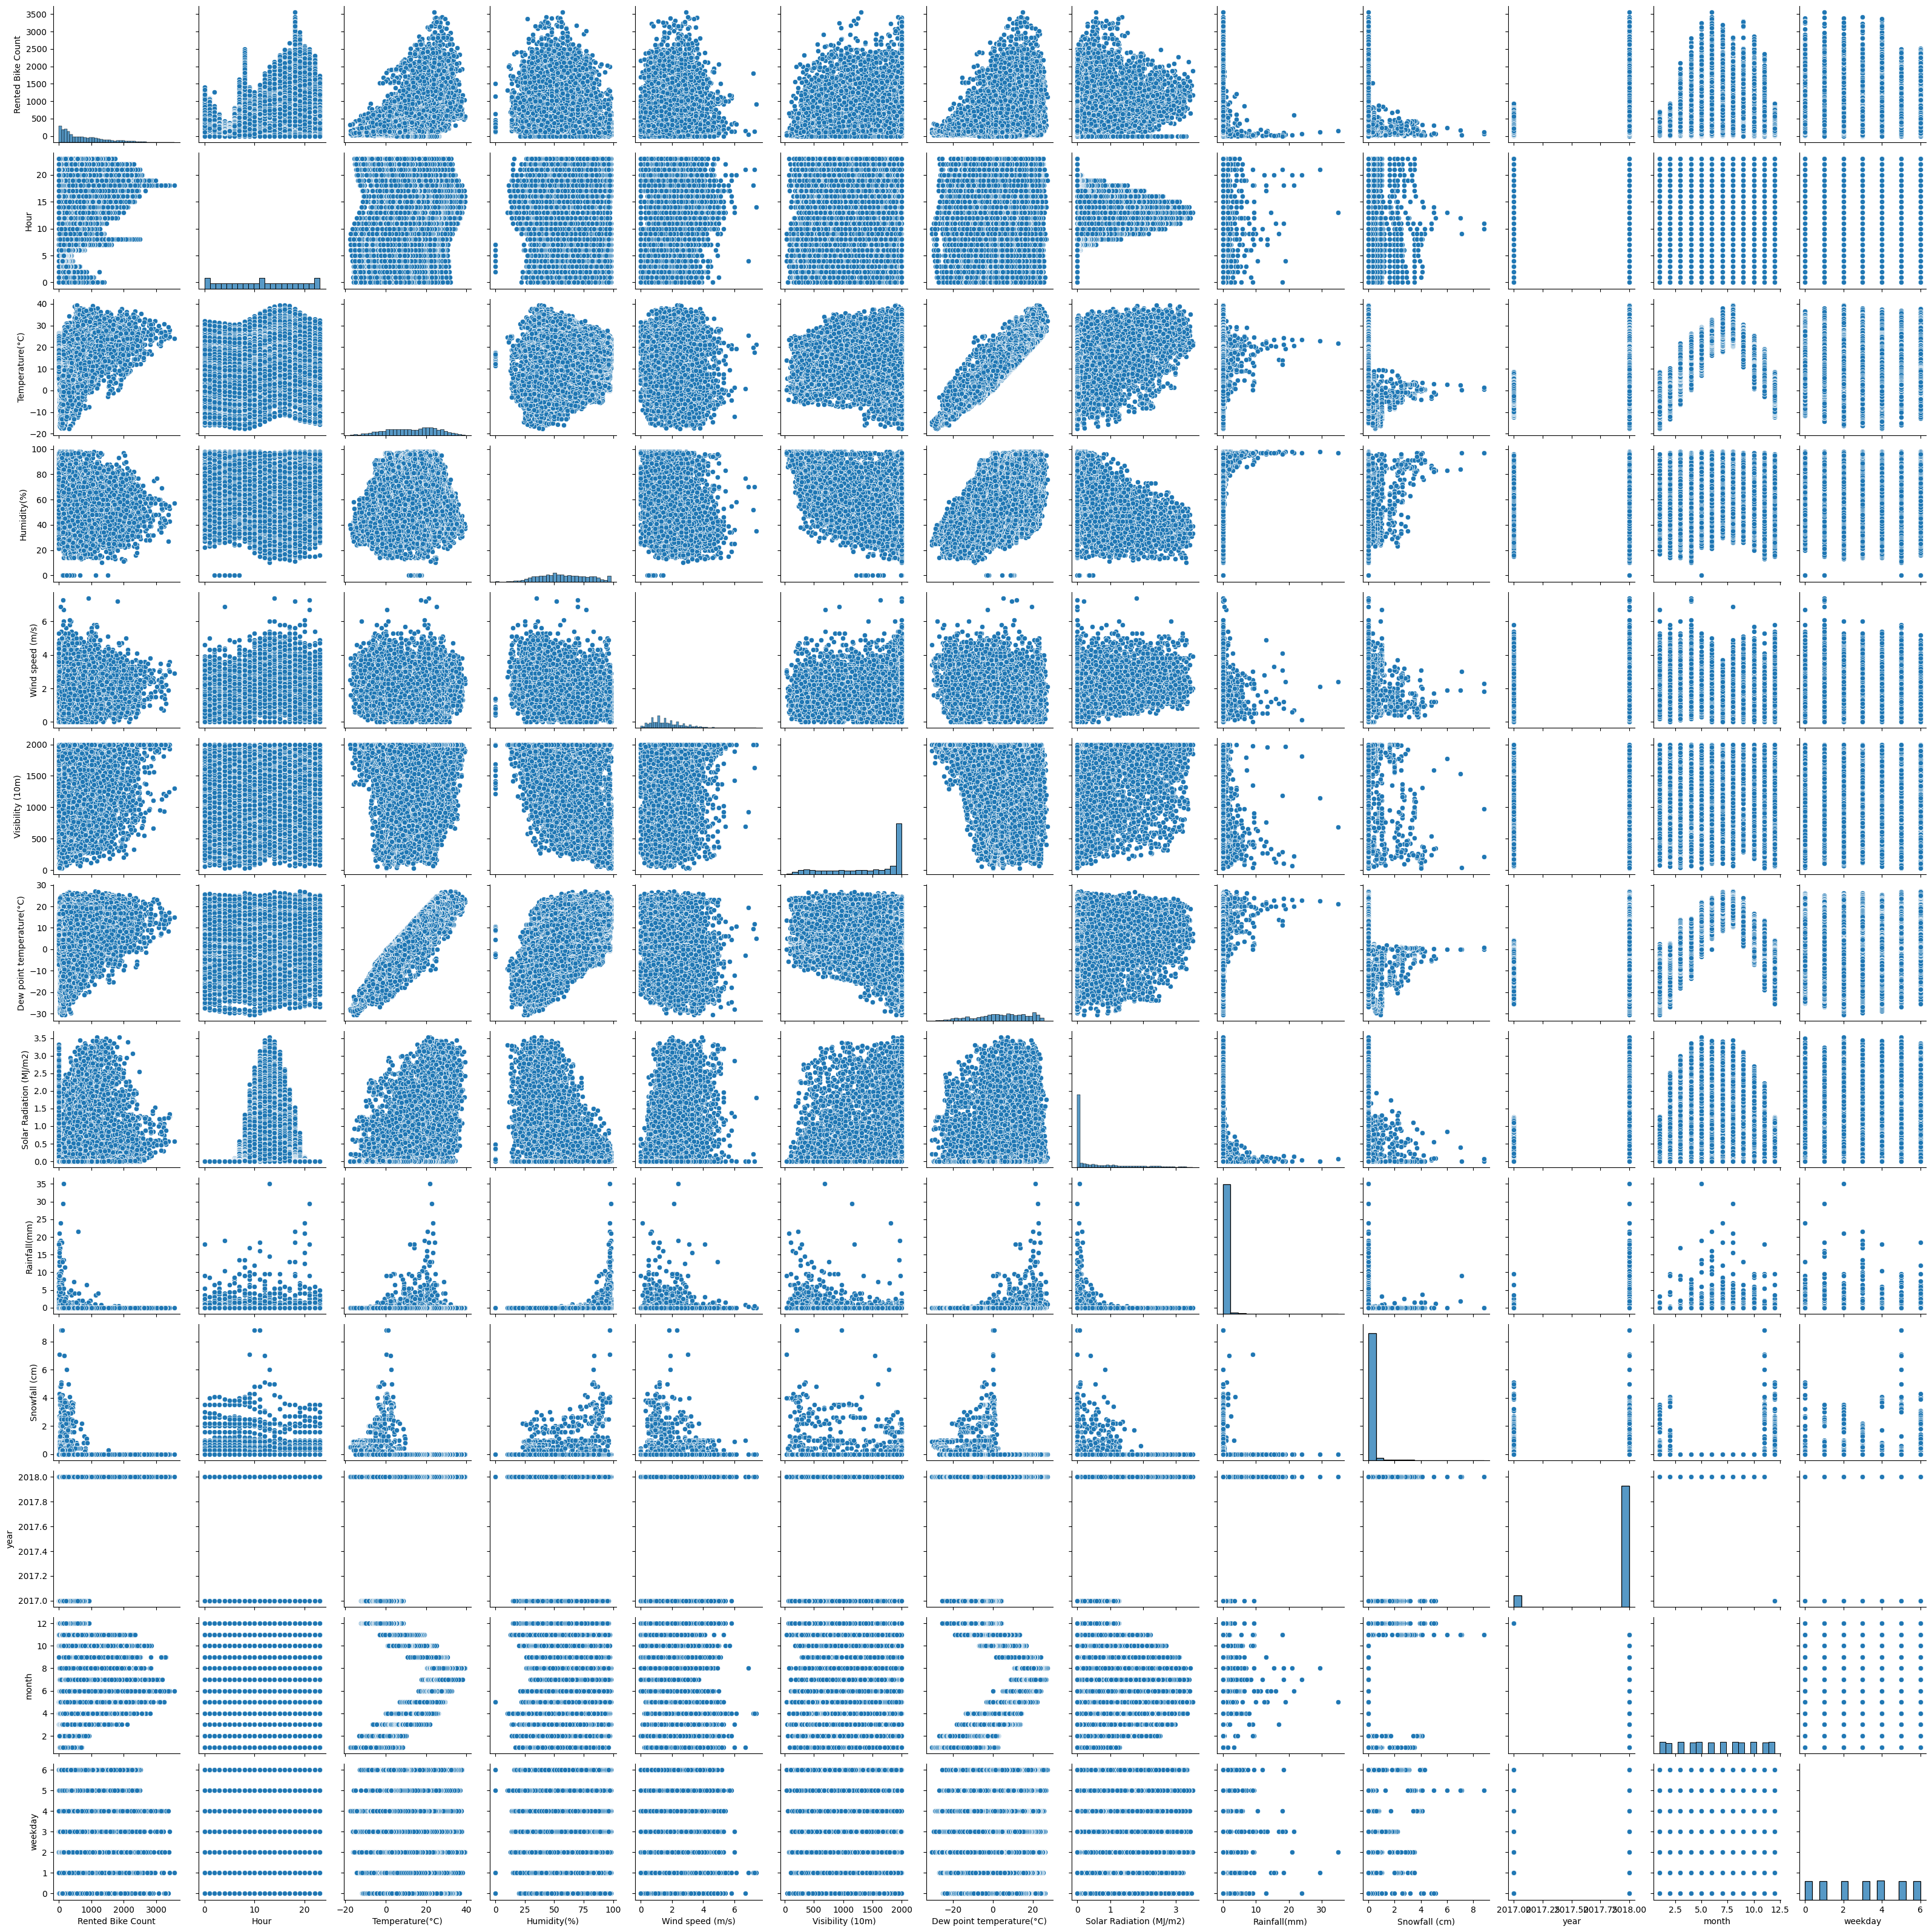

In [31]:
sns.pairplot(data=data);

Correlation Heatmap

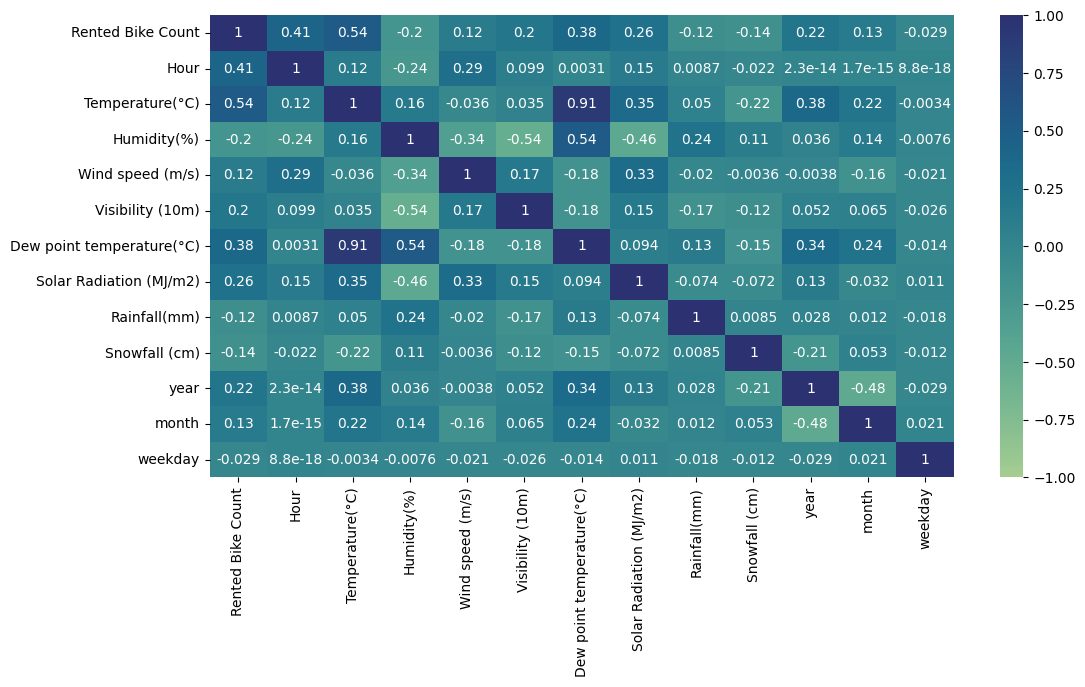

In [32]:
# sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.heatmap( data.corr(numeric_only=True), cmap='crest', annot=True, vmin=-1, vmax=1);

1. Temperature and Dew point temperature has  high Correlation between them i.e. 0.91 This will badly effect while training the model
2. Using VIF we can decide which column to remove between Temperature and Dew point Temperature


## ***6. Feature Engineering & Data Pre-processing***

In [33]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [34]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                        Hour    4.455990
1             Temperature(°C)  189.844861
2                 Humidity(%)  188.051149
3            Wind speed (m/s)    4.890215
4            Visibility (10m)   10.536390
5   Dew point temperature(°C)  127.832479
6     Solar Radiation (MJ/m2)    2.889290
7                Rainfall(mm)    1.104126
8               Snowfall (cm)    1.140342
9                        year  398.888462
10                      month    5.111189
11                    weekday    3.292391

Here Temperature(°C) and Dew point temperature(°C) has High VIF, removing Temperature(°C) and then checking VIF again

In [35]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count', 'Temperature(°C)']]])

variables        VIF
0                        Hour   4.432737
1                 Humidity(%)  34.129924
2            Wind speed (m/s)   4.887365
3            Visibility (10m)  10.513086
4   Dew point temperature(°C)   2.434344
5     Solar Radiation (MJ/m2)   2.649088
6                Rainfall(mm)   1.090043
7               Snowfall (cm)   1.139184
8                        year  75.248088
9                       month   5.108879
10                    weekday   3.270829

In [36]:
data = data.drop('Temperature(°C)', axis = 1)

### 2. Handling Outliers

data has skewed distribution, therefore using Capping & Percentile Method

In [37]:
def percentile_capping(attribute):
  # Computing 2th, 98th percentiles and replacing the outliers
  second_percentile = np.percentile(data[attribute], 2)
  ninety_eighth_percentile = np.percentile(data[attribute], 98)
  data[attribute] = np.where(data[attribute]<second_percentile, second_percentile, data[attribute])
  data[attribute] = np.where(data[attribute]>ninety_eighth_percentile, ninety_eighth_percentile, data[attribute])
  return data[attribute]

In [38]:
data['Humidity(%)'] = percentile_capping('Humidity(%)')
data['Wind speed (m/s)'] = percentile_capping('Wind speed (m/s)')
data['Visibility (10m)'] = percentile_capping('Visibility (10m)')
data['Dew point temperature(°C)'] = percentile_capping('Dew point temperature(°C)')
data['Solar Radiation (MJ/m2)'] = percentile_capping('Solar Radiation (MJ/m2)')
data['Rainfall(mm)'] = percentile_capping('Rainfall(mm)')
data['Snowfall (cm)'] = percentile_capping('Rainfall(mm)')

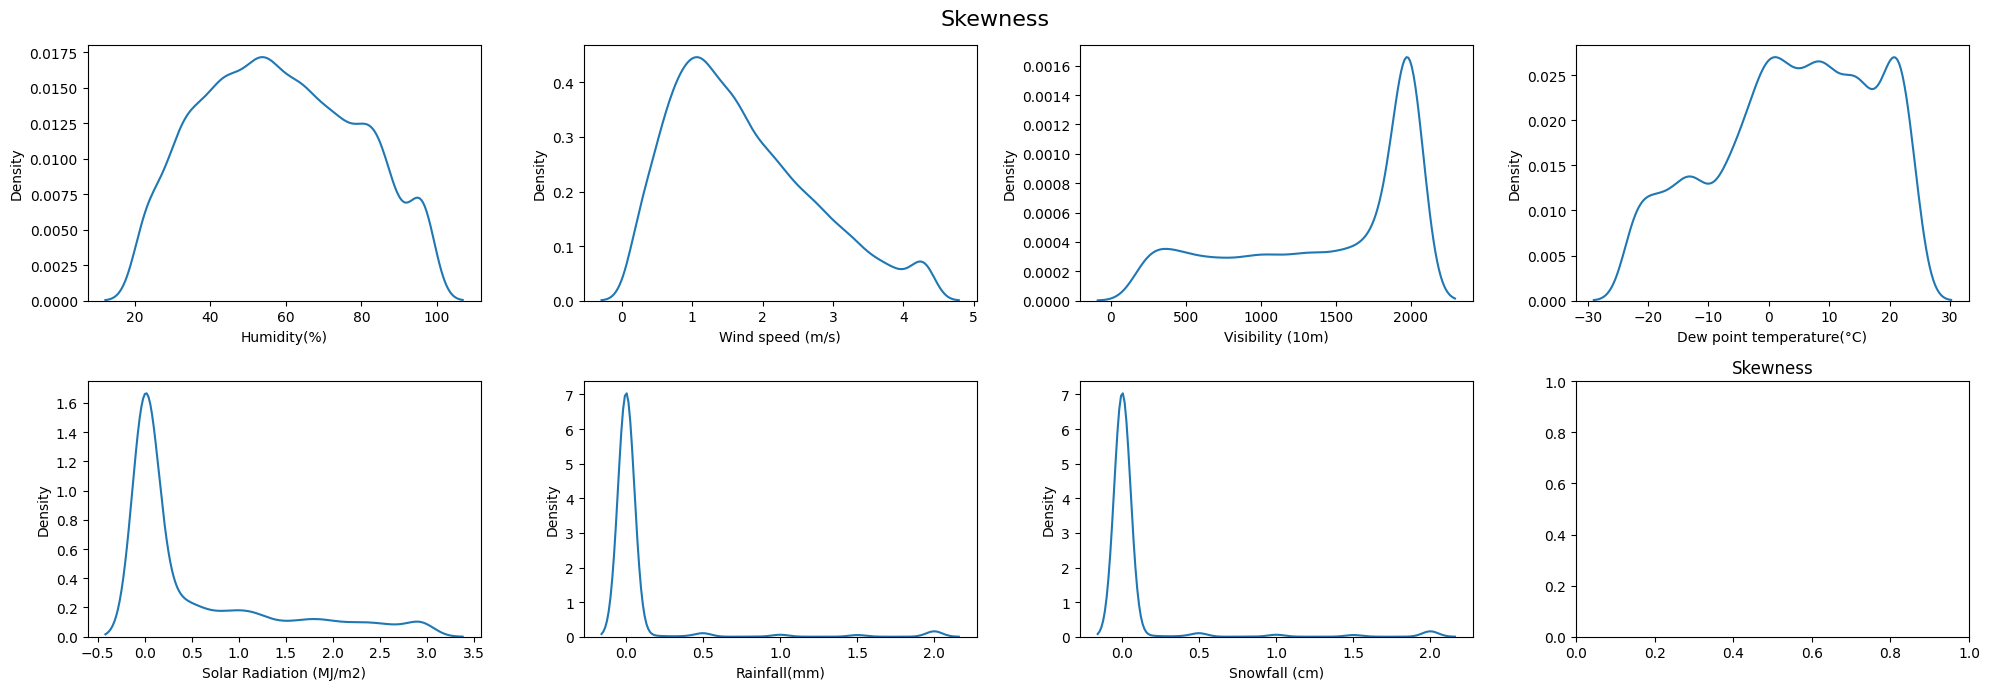

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(20, 7))
fig.suptitle('Skewness', fontsize=16)

sns.kdeplot(ax=axes[0, 0], data=data, x="Humidity(%)")
sns.kdeplot(ax=axes[0, 1], data=data, x="Wind speed (m/s)")
sns.kdeplot(ax=axes[0, 2], data=data, x="Visibility (10m)")
sns.kdeplot(ax=axes[0, 3], data=data, x="Dew point temperature(°C)")
sns.kdeplot(ax=axes[1, 0], data=data, x="Solar Radiation (MJ/m2)")
sns.kdeplot(ax=axes[1, 1], data=data, x="Rainfall(mm)")
sns.kdeplot(ax=axes[1, 2], data=data, x="Snowfall (cm)")

plt.title('Skewness')
fig.tight_layout()
plt.show()

### 5. Data Transformation

In [40]:
data['Hour'] = data['Hour'].astype(object, copy=False) #so as to later convert into dummy variable(considering it as category)

In [41]:
data['Date'] = data['Date'].dt.date

In [42]:
df_skewness = pd.DataFrame()
# Date, Temperature(°C)
for column in [ "Hour", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Rented Bike Count"]:
  skewness = data[column].skew()
  column_skewness = pd.DataFrame({'skewness': skewness }, index=[column])
  df_skewness = pd.concat([df_skewness, column_skewness])

In [43]:
df_skewness

skewness
Hour                       0.000000
Humidity(%)                0.120965
Wind speed (m/s)           0.710755
Visibility (10m)          -0.691687
Dew point temperature(°C) -0.336991
Solar Radiation (MJ/m2)    1.454406
Rainfall(mm)               5.104017
Snowfall (cm)              5.104017
Rented Bike Count          1.153428

In [44]:
df_skewness_transform = pd.DataFrame()

for column in [ "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Rented Bike Count"]:
  # Transform Your data
  skewness = data[column].skew()
  # + 1  added to deal with "0"
  log_transform = np.log(data[column]+1)
  sqrt_transform = np.sqrt(data[column])
  #+ 1  added to deal with "0"
  boxcox_transform = pd.Series(stats.boxcox(data[column]+1)[0])
  column_skewness = pd.DataFrame({'skewness': skewness, 'log_transform': log_transform.skew(), 'sqrt_transform': sqrt_transform.skew(), 'boxcox_transform': boxcox_transform.skew() }, index=[column])
  df_skewness_transform = pd.concat([df_skewness_transform, column_skewness])

df_skewness_transform

skewness  log_transform  sqrt_transform  \
Solar Radiation (MJ/m2)  1.454406       1.046464        0.794319   
Rainfall(mm)             5.104017       4.722471        4.376683   
Snowfall (cm)            5.104017       4.722471        4.376683   
Rented Bike Count        1.153428      -1.832199        0.237362   

                         boxcox_transform  
Solar Radiation (MJ/m2)          0.561561  
Rainfall(mm)                     3.702287  
Snowfall (cm)                    3.702287  
Rented Bike Count               -0.127438

In [45]:
data["Rainfall(mm)"] = pd.Series(stats.boxcox(data["Rainfall(mm)"]+1)[0]).to_numpy()
data["Snowfall (cm)"] = pd.Series(stats.boxcox(data["Snowfall (cm)"]+1)[0]).to_numpy()

In [46]:
data["Solar Radiation (MJ/m2)"] = pd.Series(stats.boxcox(data["Solar Radiation (MJ/m2)"]+1)[0]).to_numpy()
data["Rented Bike Count"] = pd.Series(stats.boxcox(data["Rented Bike Count"]+1)[0]).to_numpy()

### 3. Categorical Encoding

In [47]:
# Encoding categorical columns
data.loc[data['Holiday'] == 'No Holiday','Holiday'] = 0
data.loc[data['Holiday'] == 'Holiday','Holiday'] = 1

In [48]:
data.loc[data['Functioning Day'] == 'No','Functioning Day'] = 0
data.loc[data['Functioning Day'] == 'Yes','Functioning Day'] = 1

In [49]:
data.loc[data['Seasons'] == 'Spring','Seasons'] = 0
data.loc[data['Seasons'] == 'Summer','Seasons'] = 1
data.loc[data['Seasons'] == 'Autumn','Seasons'] = 2
data.loc[data['Seasons'] == 'Winter','Seasons'] = 3

In [50]:
data=pd.get_dummies(data,drop_first=True,sparse=True)

<ipython-input-50-16f9adb477c6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data=pd.get_dummies(data,drop_first=True,sparse=True)
<ipython-input-50-16f9adb477c6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data=pd.get_dummies(data,drop_first=True,sparse=True)
<ipython-input-50-16f9adb477c6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data=pd.get_dummies(data,drop_first=True,sparse=True)
<ipython-input-50-16f9adb477c6>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data=pd.get_dummies(data,drop_first=True,sparse=True)


### 8. Data Splitting

In [51]:
X = data.drop('Rented Bike Count', axis = 1)
y = data['Rented Bike Count']

In [52]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# for creating new indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### 6. Data Scaling

In [53]:
# Scaling data
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
reg = LinearRegression().fit(X_train, y_train)

In [55]:
reg.score(X_train, y_train)

0.8766736889134061

In [56]:
reg.score(X_test,y_test)

0.862054372164043

In [57]:
count_mean = y_train.mean()

In [58]:
y_pred_LR = reg.predict(X_test)
r2_LR = r2_score(y_test, y_pred_LR)
MSE_LR  = mean_squared_error(y_test, y_pred_LR)
RMSE_LR = np.sqrt(MSE_LR)
RMPSE_LR = RMSE_LR/count_mean

In [59]:
table = [['Model', 'R2', 'MSE', 'RMSE', 'RMPSE'],
         ['Linear Regression', r2_LR, MSE_LR, RMSE_LR, RMPSE_LR]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤══════════╤════════╤═════════╤══════════╕
│ Model             │       R2 │    MSE │    RMSE │    RMPSE │
╞═══════════════════╪══════════╪════════╪═════════╪══════════╡
│ Linear Regression │ 0.862054 │ 13.232 │ 3.63759 │ 0.163531 │
╘═══════════════════╧══════════╧════════╧═════════╧══════════╛


R2 score of a model is 0.86, indicating that the model can explain approximately 86% of the variance in the data. This score is considered quite high, implying that the model performs well in capturing the patterns and trends present in the dataset.

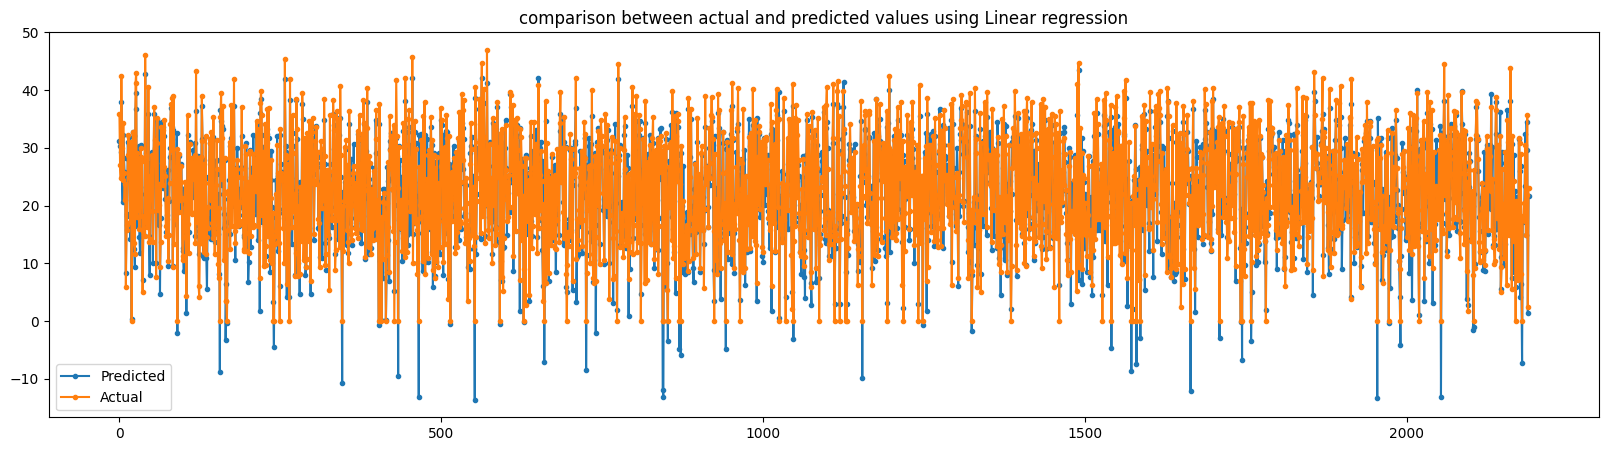

In [60]:
plt.figure(figsize=(20,5))
plt.title("comparison between actual and predicted values using Linear regression")
plt.plot(y_pred_LR, label='Predicted', marker='.')
plt.plot(y_test, label='Actual', marker='.')
plt.legend()

### ML Model - 2

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = { 'alpha' : [200, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001], 'solver' : ['svd', 'cholesky', 'lsqr', 'sag'], 'fit_intercept' :[True, False] }

Linear_Reg = Ridge(random_state=0)

LR_grid= GridSearchCV(Linear_Reg, param_grid=params, scoring='r2', n_jobs=-1, cv= 10, verbose=5, return_train_score=True)
# cv =10 i.e 10 fold

LR_grid.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
CPU times: user 7.44 s, sys: 462 ms, total: 7.91 s
Wall time: 7min 34s


GridSearchCV(cv=10, estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': [200, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             return_train_score=True, scoring='r2', verbose=5)

In [ ]:
train_MAE= LR_grid.cv_results_['mean_train_score']
cv_MAE = LR_grid.cv_results_['mean_test_score']
best_alpha=LR_grid.best_params_['alpha']
best_solver=LR_grid.best_params_['solver']
best_fit_intercept=LR_grid.best_params_['fit_intercept']
bestScore=LR_grid.best_score_

In [ ]:
Linear_Reg = Ridge(alpha = best_alpha, solver = best_solver, fit_intercept = best_fit_intercept, random_state=0)
Linear_Reg.fit(X_train, y_train)

Ridge(alpha=10, random_state=0, solver='sag')

In [ ]:
y_pred_LR_Ridge = Linear_Reg.predict(X_test)
r2_LR_Ridge = r2_score(y_test, y_pred_LR_Ridge)
MSE_LR_Ridge  = mean_squared_error(y_test, y_pred_LR_Ridge)
RMSE_LR_Ridge = np.sqrt(MSE_LR_Ridge)
RMPSE_LR_Ridge = RMSE_LR_Ridge/count_mean

In [ ]:
table = [['Model', 'R2', 'MSE', 'RMSE', 'RMPSE'],
         ['Linear Regression(Ridge)', r2_LR_Ridge, MSE_LR_Ridge, RMSE_LR_Ridge, RMPSE_LR_Ridge]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════╤══════════╤═════════╤═════════╤══════════╕
│ Model                    │       R2 │     MSE │    RMSE │    RMPSE │
╞══════════════════════════╪══════════╪═════════╪═════════╪══════════╡
│ Linear Regression(Ridge) │ 0.862183 │ 13.2197 │ 3.63589 │ 0.163455 │
╘══════════════════════════╧══════════╧═════════╧═════════╧══════════╛


R2 score of a model is 0.86, indicating that the model can explain approximately 86% of the variance in the data. This score is considered quite high, implying that the model performs well in capturing the patterns and trends present in the dataset.

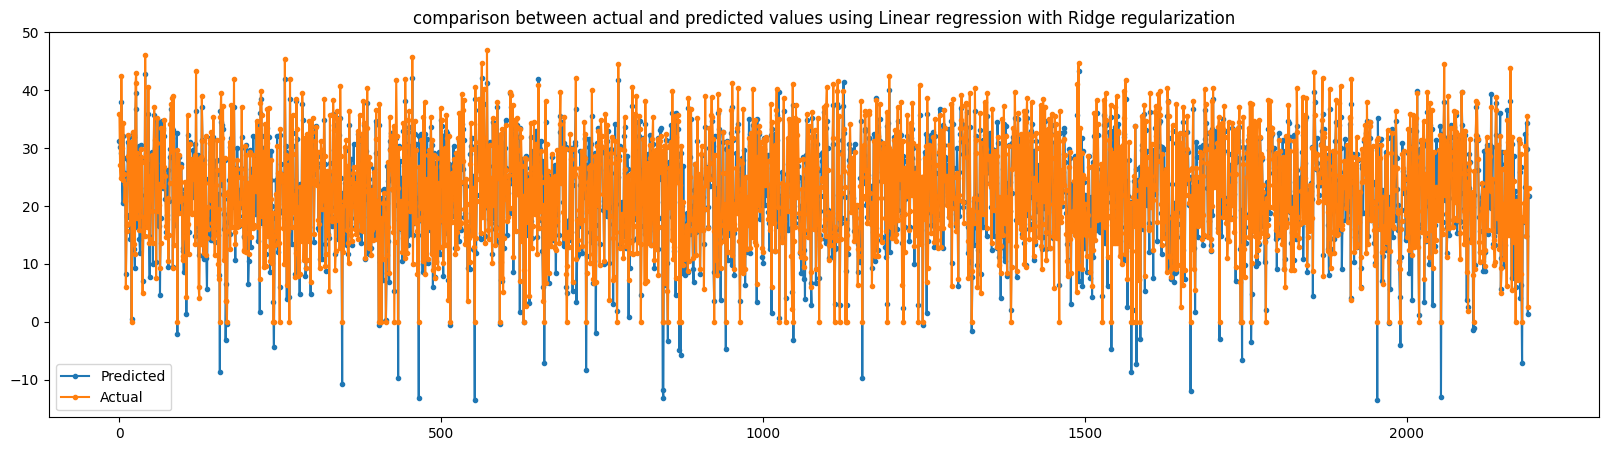

In [ ]:
plt.figure(figsize=(20,5))
plt.title("comparison between actual and predicted values using Linear regression with Ridge regularization")
plt.plot(y_pred_LR_Ridge, label='Predicted', marker='.')
plt.plot(y_test, label='Actual', marker='.')
plt.legend()

### ML Model - 3

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = { 'alpha' : [200, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001] }

Linear_Reg = Lasso(random_state=0)

LR_grid= GridSearchCV(Linear_Reg, param_grid=params, scoring='r2', n_jobs=-1, cv= 10, verbose=5, return_train_score=True)
# cv =10 i.e 10 fold

LR_grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
CPU times: user 5.33 s, sys: 1.27 s, total: 6.6 s
Wall time: 1min 24s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+03, tolerance: 6.568e+01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [200, 100, 10, 1.0, 0.1, 0.01, 0.001,
                                   0.0001]},
             return_train_score=True, scoring='r2', verbose=5)

In [ ]:
train_MAE= LR_grid.cv_results_['mean_train_score']
cv_MAE = LR_grid.cv_results_['mean_test_score']
best_alpha=LR_grid.best_params_['alpha']
bestScore=LR_grid.best_score_

In [ ]:
Linear_Reg = Lasso(alpha = best_alpha, random_state=0)
Linear_Reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+03, tolerance: 6.568e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, random_state=0)

In [ ]:
y_pred_LR_Lasso = Linear_Reg.predict(X_test)
r2_LR_Lasso = r2_score(y_test, y_pred_LR_Lasso)
MSE_LR_Lasso  = mean_squared_error(y_test, y_pred_LR_Lasso)
RMSE_LR_Lasso = np.sqrt(MSE_LR_Lasso)
RMPSE_LR_Lasso = RMSE_LR_Lasso/count_mean

In [ ]:
table = [['Model', 'R2', 'MSE', 'RMSE', 'RMPSE'],
         ['Linear Regression(Lasso)', r2_LR_Lasso, MSE_LR_Lasso, RMSE_LR_Lasso, RMPSE_LR_Lasso]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════╤══════════╤═════════╤═════════╤══════════╕
│ Model                    │       R2 │     MSE │    RMSE │    RMPSE │
╞══════════════════════════╪══════════╪═════════╪═════════╪══════════╡
│ Linear Regression(Lasso) │ 0.862172 │ 13.2207 │ 3.63603 │ 0.163461 │
╘══════════════════════════╧══════════╧═════════╧═════════╧══════════╛


R2 score of a model is 0.86, indicating that the model can explain approximately 86% of the variance in the data. This score is considered quite high, implying that the model performs well in capturing the patterns and trends present in the dataset.

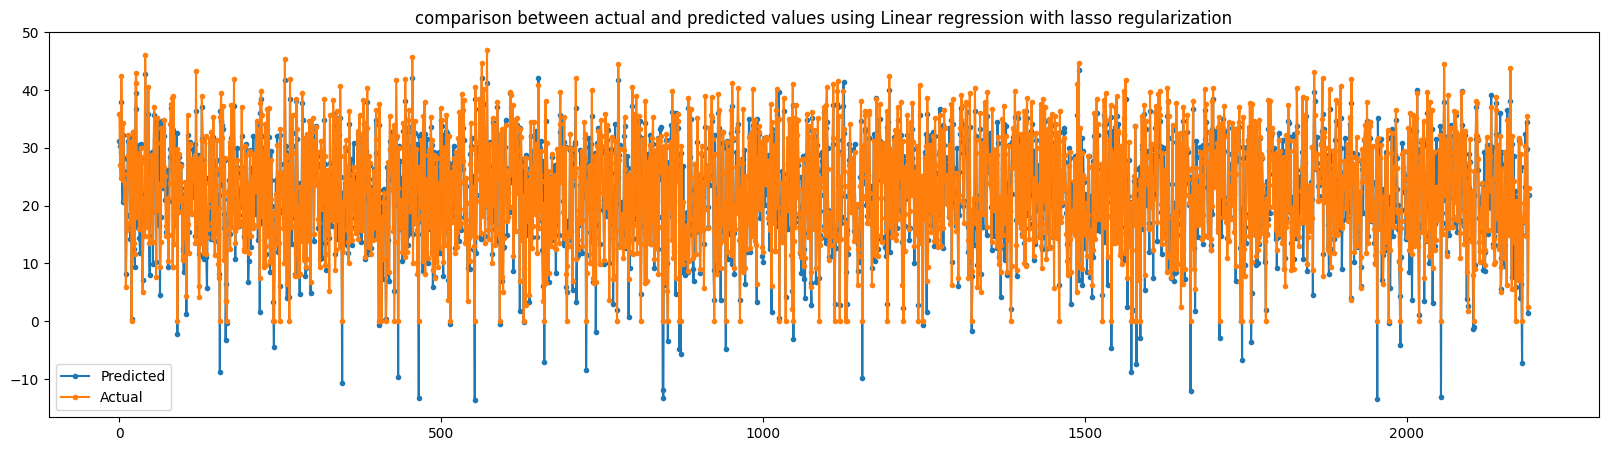

In [ ]:
plt.figure(figsize=(20,5))
plt.title("comparison between actual and predicted values using Linear regression with lasso regularization")
plt.plot(y_pred_LR_Lasso, label='Predicted', marker='.')
plt.plot(y_test, label='Actual', marker='.')
plt.legend()

### ML Model - 4

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = {'max_depth': [1, 3, 10, 30], 'min_samples_split':[5, 10, 100, 500]}

decision_tree_reg = DecisionTreeRegressor(random_state=0)

decision_tree_grid = GridSearchCV(decision_tree_reg, param_grid=params,scoring='neg_mean_squared_log_error',n_jobs=-1,  cv= 10, verbose=5,return_train_score=True)
# cv =10 i.e 10 fold


decision_tree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
CPU times: user 515 ms, sys: 44.6 ms, total: 559 ms
Wall time: 13.2 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='neg_mean_squared_log_error',
             verbose=5)

In [ ]:
train_score= decision_tree_grid.cv_results_['mean_train_score']
cv_score = decision_tree_grid.cv_results_['mean_test_score']
best_max_depth=decision_tree_grid.best_params_['max_depth']
best_min_samples_split=decision_tree_grid.best_params_['min_samples_split']
bestScore=decision_tree_grid.best_score_

In [ ]:
print("Train score:", train_score)
print("\nCV score:", cv_score)
print("\nBest max_depth:", best_max_depth)
print("\nBest min_samples_split:", best_min_samples_split)
print("\nBest Score:", bestScore)

Train score: [-0.20570383 -0.20570383 -0.20570383 -0.20570383 -0.1158895  -0.1158895
 -0.1158895  -0.1158895  -0.03325051 -0.03432047 -0.04772479 -0.06224021
 -0.00232458 -0.00679588 -0.03722049 -0.05866003]

CV score: [-0.20576541 -0.20576541 -0.20576541 -0.20576541 -0.11722785 -0.11722785
 -0.11722785 -0.11722785 -0.05505226 -0.05448444 -0.05590358 -0.06602252
 -0.04707467 -0.04427674 -0.0477961  -0.06258152]

Best max_depth: 30

Best min_samples_split: 10

Best Score: -0.044276737669751945


In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth = best_max_depth, min_samples_split = best_min_samples_split, random_state=0)
decision_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=10, random_state=0)

In [ ]:
y_pred_DT = decision_tree_reg.predict(X_test)
r2_DT = r2_score(y_test, y_pred_DT)
MSE_DT  = mean_squared_error(y_test, y_pred_DT)
RMSE_DT = np.sqrt(MSE_DT)
RMPSE_DT = RMSE_DT/count_mean

In [ ]:
table = [['Model', 'R2', 'MSE', 'RMSE', 'RMPSE'],
         ['Decision Tree Regressor', r2_DT, MSE_DT, RMSE_DT, RMPSE_DT]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════╤══════════╤═════════╤═════════╤═════════╕
│ Model                   │       R2 │     MSE │    RMSE │   RMPSE │
╞═════════════════════════╪══════════╪═════════╪═════════╪═════════╡
│ Decision Tree Regressor │ 0.871456 │ 12.3302 │ 3.51144 │ 0.15786 │
╘═════════════════════════╧══════════╧═════════╧═════════╧═════════╛


R2 score of a model is 0.87, indicating that the model can explain approximately 87% of the variance in the data. This score is considered quite high, implying that the model performs well in capturing the patterns and trends present in the dataset.

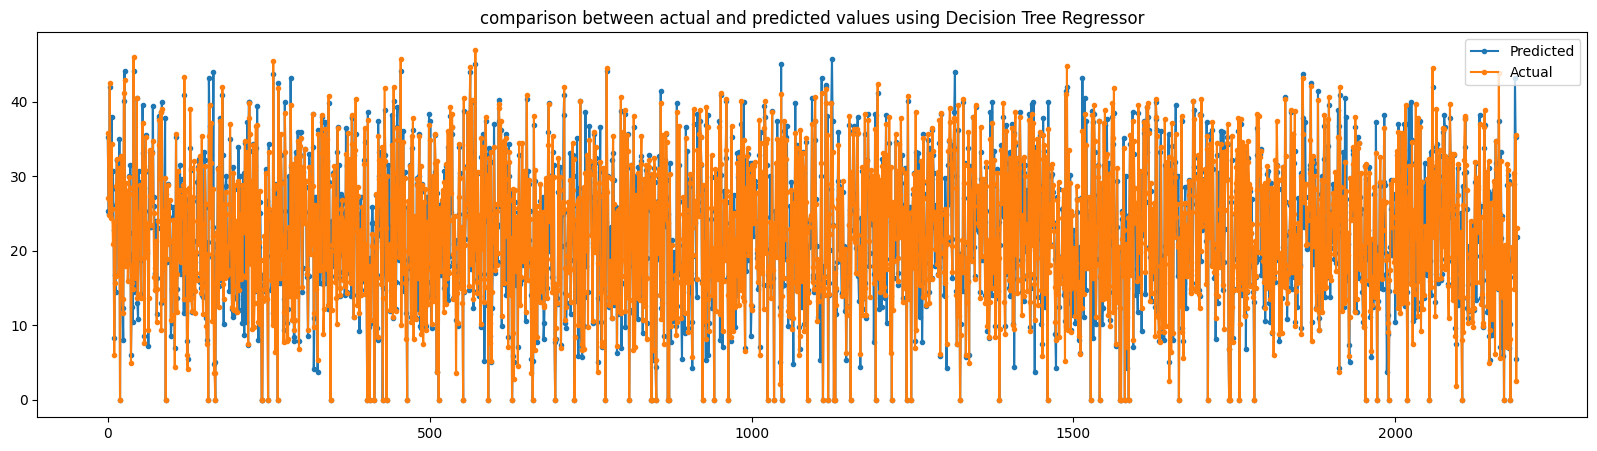

In [ ]:
plt.figure(figsize=(20,5))
plt.title("comparison between actual and predicted values using Decision Tree Regressor")
plt.plot(y_pred_DT, label='Predicted', marker='.')
plt.plot(y_test, label='Actual', marker='.')
plt.legend()